In [2]:
import pandas as pd
import numpy as np

## IMPORT DATA

In [3]:
df = pd.read_excel('data_pointage_2022-12-07.xlsx')

### DATA COUNT

In [4]:
print(df.shape)

(5566, 13)


### DATA TYPE

In [5]:
print(df.dtypes)

id                 int64
datetimeDebut     object
datetimeFin       object
pointageIn        object
pointageOut       object
etudiant           int64
matiere           object
nom_etudiant      object
sex_etudiant     float64
nom_matiere       object
nom_profs         object
nom_niveau        object
nom_parcours      object
dtype: object


### DATA DESCRIPTION

In [6]:
print(df.describe())

               id     etudiant  sex_etudiant
count  5566.00000  5566.000000   5565.000000
mean   2783.50000   564.172655      1.296496
std    1606.91013    30.845554      0.456753
min       1.00000   509.000000      1.000000
25%    1392.25000   538.000000      1.000000
50%    2783.50000   565.000000      1.000000
75%    4174.75000   591.000000      2.000000
max    5566.00000   616.000000      2.000000


## DATA PREPROCESSING

### SUPPRESSION DE COLUMNS INUTILE

In [7]:
df.head()

,id,datetimeDebut,datetimeFin,pointageIn,pointageOut,etudiant,matiere,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,1,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,547,b38db8b2-4790-489e-a7f1-e82072e5e94e,ANDRIAMAHEFA Nantenaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
1,2,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,548,b38db8b2-4790-489e-a7f1-e82072e5e94e,ANDRIAMALALA Voniarison Solange,NaN,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
2,3,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,549,b38db8b2-4790-489e-a7f1-e82072e5e94e,ANDRIAMALAZAMANGA Benoit,1.0,LANGAGE DE PROGRAMMATION JAVA,NaN,L1,GB
3,4,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,550,b38db8b2-4790-489e-a7f1-e82072e5e94e,ANDRIAMAMONJY Fernand,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
4,5,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,551,b38db8b2-4790-489e-a7f1-e82072e5e94e,ANDRIAMANAJA Carlosse Helvin,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB


In [8]:
df.drop(['id', 'matiere', 'etudiant'],axis=1, inplace=True)
df.head()

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMAHEFA Nantenaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
1,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMALALA Voniarison Solange,NaN,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
2,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMALAZAMANGA Benoit,1.0,LANGAGE DE PROGRAMMATION JAVA,NaN,L1,GB
3,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMAMONJY Fernand,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
4,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMANAJA Carlosse Helvin,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB


### GERER LES VALEURS MANQUANTES

In [9]:
data_null = df.isnull()
data_null

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5561,False,False,False,False,False,False,False,False,False,False
5562,False,False,False,False,False,False,False,False,False,False
5563,False,False,False,False,False,False,False,False,False,False
5564,False,False,False,False,False,False,True,False,False,False


In [10]:
df[df['nom_etudiant'].isnull()]

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
5565,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,NO,NO,NaN,1.0,FRANCAIS,Mme RAHOJERY,L1,IG


In [11]:
df.dropna(axis=0, inplace=True)
df.isnull()

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5559,False,False,False,False,False,False,False,False,False,False
5560,False,False,False,False,False,False,False,False,False,False
5561,False,False,False,False,False,False,False,False,False,False
5562,False,False,False,False,False,False,False,False,False,False


### NOTMALISATION DU DATASET

In [12]:
df.shape

(5562, 10)

In [13]:
df

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMAHEFA Nantenaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
3,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMAMONJY Fernand,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
4,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMANAJA Carlosse Helvin,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
5,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMANALINARIVO Harimanana Safidiniaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
6,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,YES,YES,ANDRIAMANALINARIVO Samy Esthor,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
...,...,...,...,...,...,...,...,...,...,...
5559,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,NO,NO,RAKOTO ARIVAHOAKA Gilbert,1.0,FRANCAIS,Mme RAHOJERY,L1,IG
5560,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,NO,NO,RAKOTOARIVELO Mamisoa Zinah,2.0,FRANCAIS,Mme RAHOJERY,L1,IG
5561,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,NO,NO,RAKOTOARIVELO Zafinirina Martin,1.0,FRANCAIS,Mme RAHOJERY,L1,IG
5562,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,NO,NO,RAKOTOBE Miarintsoa Nandrianina,1.0,FRANCAIS,Mme RAHOJERY,L1,IG


In [14]:
score = {
    "YES": 1,
    "NO": 0
    }
df['pointageIn'] = df['pointageIn'].map(score)
df['pointageOut'] = df['pointageOut'].map(score)
df

,datetimeDebut,datetimeFin,pointageIn,pointageOut,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours
0,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,1,1,ANDRIAMAHEFA Nantenaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
3,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,1,1,ANDRIAMAMONJY Fernand,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
4,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,1,1,ANDRIAMANAJA Carlosse Helvin,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
5,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,1,1,ANDRIAMANALINARIVO Harimanana Safidiniaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
6,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,1,1,ANDRIAMANALINARIVO Samy Esthor,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB
...,...,...,...,...,...,...,...,...,...,...
5559,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,0,0,RAKOTO ARIVAHOAKA Gilbert,1.0,FRANCAIS,Mme RAHOJERY,L1,IG
5560,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,0,0,RAKOTOARIVELO Mamisoa Zinah,2.0,FRANCAIS,Mme RAHOJERY,L1,IG
5561,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,0,0,RAKOTOARIVELO Zafinirina Martin,1.0,FRANCAIS,Mme RAHOJERY,L1,IG
5562,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,0,0,RAKOTOBE Miarintsoa Nandrianina,1.0,FRANCAIS,Mme RAHOJERY,L1,IG


## DATA ANALYSIS

In [15]:
df['nom_matiere'].value_counts()

METHODE DE CONCEPTION MERISE             910
PROBABILITE-STATISTIQUE                  901
ANGLAIS                                  718
LANGAGE DE PROGRAMMATION JAVA            572
FRANCAIS                                 538
RESOLUTION OPERATIONNELLE                483
Système d'exploitation Unix              359
Hypertext markup language                359
SYSTEME DE GESTION DE BASE DE DONNEES    304
SYSTEME D'EXPLOITATION WINDOWS           228
Protocole TCP/IP                         190
Name: nom_matiere, dtype: int64

In [16]:
import matplotlib.pyplot as plt

In [17]:
df['pointage'] = df.apply(lambda x: x['pointageIn'] + x['pointageOut'], axis=1)
df.drop(['pointageIn', 'pointageOut'], axis=1, inplace=True)
df

,datetimeDebut,datetimeFin,nom_etudiant,sex_etudiant,nom_matiere,nom_profs,nom_niveau,nom_parcours,pointage
0,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,ANDRIAMAHEFA Nantenaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB,2
3,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,ANDRIAMAMONJY Fernand,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB,2
4,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,ANDRIAMANAJA Carlosse Helvin,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB,2
5,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,ANDRIAMANALINARIVO Harimanana Safidiniaina,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB,2
6,2022-01-10T10:30:00Z,2022-01-10T12:00:00Z,ANDRIAMANALINARIVO Samy Esthor,1.0,LANGAGE DE PROGRAMMATION JAVA,Dr RATIARISON Venot,L1,GB,2
...,...,...,...,...,...,...,...,...,...
5559,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,RAKOTO ARIVAHOAKA Gilbert,1.0,FRANCAIS,Mme RAHOJERY,L1,IG,0
5560,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,RAKOTOARIVELO Mamisoa Zinah,2.0,FRANCAIS,Mme RAHOJERY,L1,IG,0
5561,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,RAKOTOARIVELO Zafinirina Martin,1.0,FRANCAIS,Mme RAHOJERY,L1,IG,0
5562,2022-03-21T09:00:00Z,2022-03-21T10:30:00Z,RAKOTOBE Miarintsoa Nandrianina,1.0,FRANCAIS,Mme RAHOJERY,L1,IG,0


### REPARTITION DES ACTIVITES PAR MATIERES

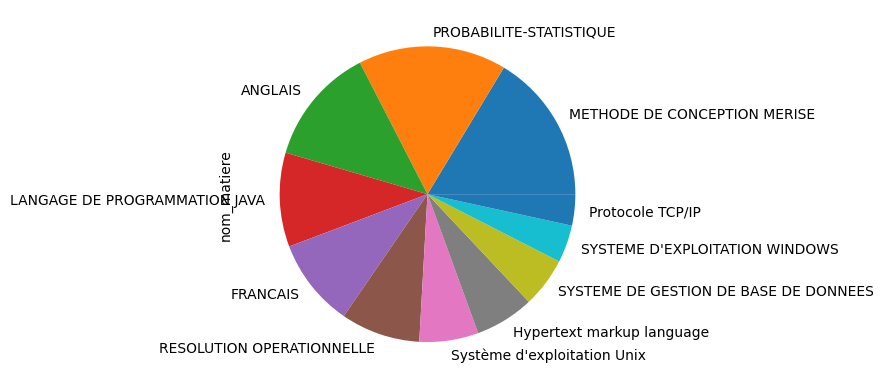

In [18]:
df['nom_matiere'].value_counts().plot.pie()
plt.show()

### REPATITION DES ACTIVITES PAR ENSEIGNANT

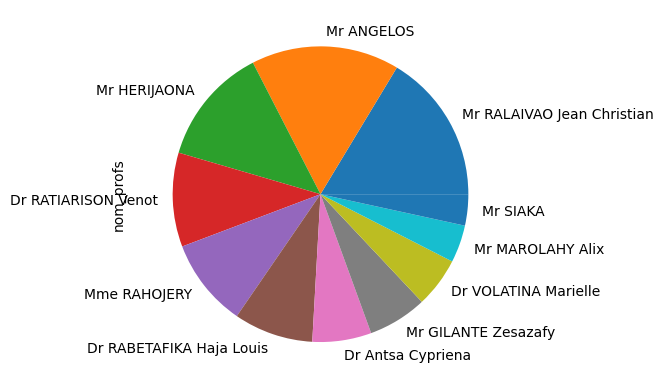

In [19]:
df['nom_profs'].value_counts().plot.pie()
plt.show()

### AGILITE DES ETUDIANTS

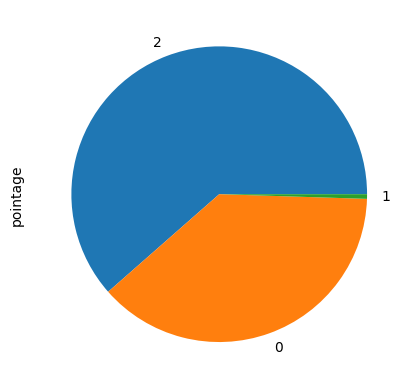

In [20]:
df['pointage'].value_counts().plot.pie()
plt.show()

### UNDIFINED

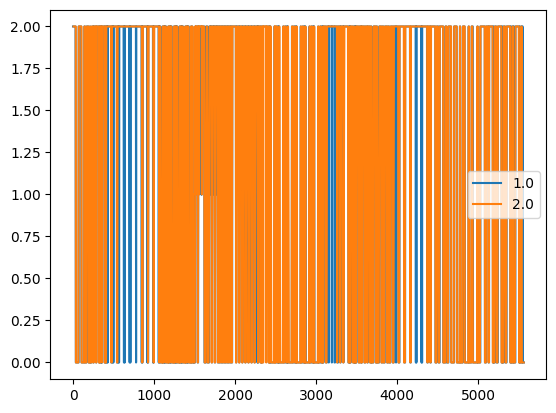

In [21]:
df.groupby()